### Importing Libraries required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Reading the file and loading the data it into dataframe

In [2]:
df=pd.read_csv("C:/Users/akash/Desktop/Scaler/netflix.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Checking the missing values in each column also checking the data types of each column.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Below plot is to see we have any relanships between missing values and there is none

<AxesSubplot:>

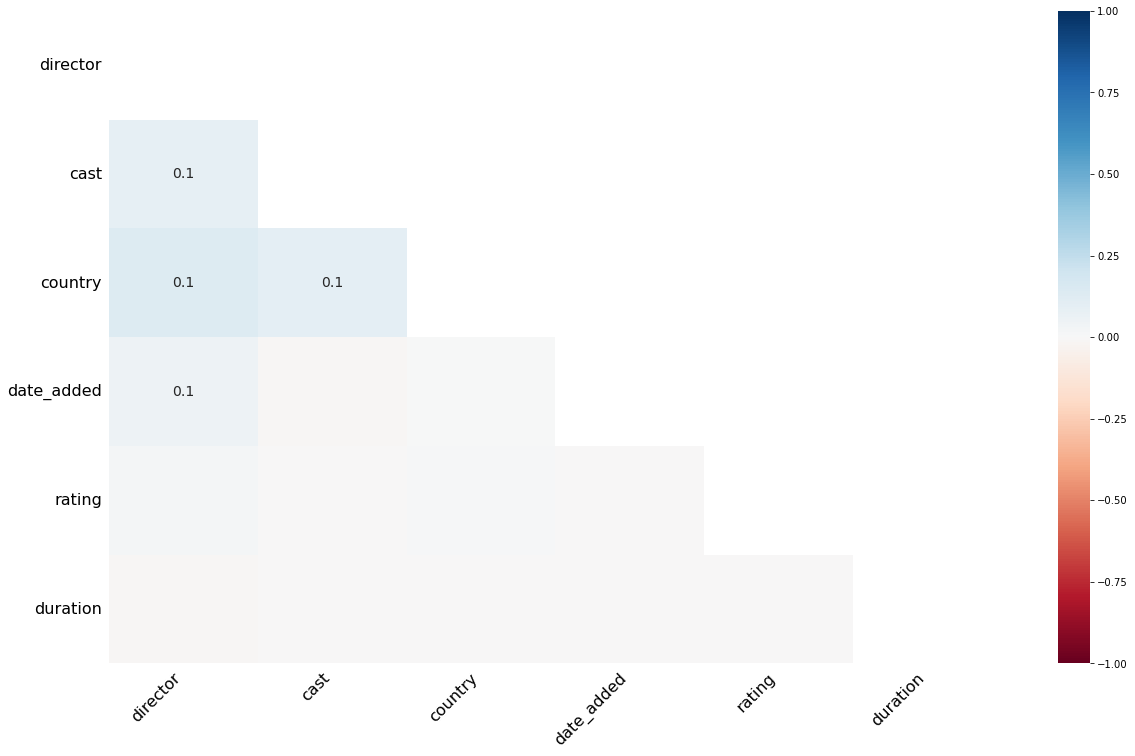

In [6]:
msno.heatmap(df,labels=True)

In [7]:
df['date_added']=pd.to_datetime(df['date_added'])

In [8]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


#### Observations from below dataset.

 - David Attenborough casted in more number of movies+TV series.
 - Rajiv Chilaka directed most number of movies+TV series.
 - 109 movies and TV Shows released on January 1 2020 on netflix is the most in one day.
 - TV-MA most number of movies+TV series made in this rating.
 - United States made more number of movies , as per this we can say that they have largest film industry and big audience.
 - we have Tv series or movies released from 1925- 2021

In [9]:
df.describe(include=['object','int64'])

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,NaN,17,220,514,8775
top,s4369,Movie,The Land,Rajiv Chilaka,David Attenborough,United States,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


#### Outliers 
 - From above we can see that year seems to have outliers becuase minimum is 1925 and 25 percent is 2013 , lets check with a boxplot.
 - As we see in Boxplot clearely data below year 2000 is a outlier that say from 1925 to 2000 , we have 75 outliers in this year column for the dataset.

<AxesSubplot:ylabel='release_year'>

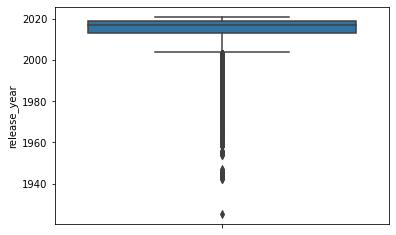

In [10]:
sns.boxplot(y='release_year',data=df)

### How has the number of movies released per year changed years?

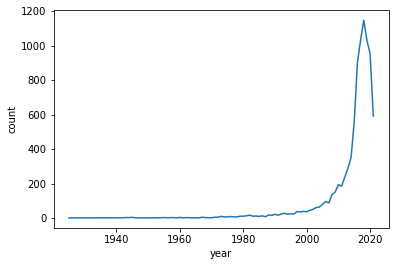

In [11]:
df.sort_values(by='release_year',inplace=True,ascending=False)
df_y=df['release_year'].value_counts(sort=True).reset_index()
df_y.rename(columns={'index':'year','release_year':'count'},inplace=True)
sns.lineplot(x='year',y='count',data=df_y)
plt.show()

- We can see that after 2019 there is a decrease in movie and TV shows release which is caused by corona
- As we see the graph that we can say that after year 2000 movie and TV shows releases started raising exponentially.

####  Lets compare Movies and TV shows how the number of releases changed over the course of the years.

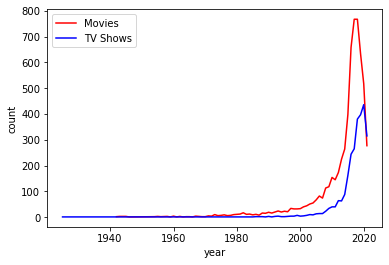

In [47]:
df_m=df[df['type']=='Movie']
df_tv=df[df['type']=='TV Show']
df_m=df_m['release_year'].value_counts(sort=True).reset_index()
df_tv=df_tv['release_year'].value_counts(sort=True).reset_index()
df_m.rename(columns={'index':'year','release_year':'count'},inplace=True)
df_tv.rename(columns={'index':'year','release_year':'count'},inplace=True)
sns.lineplot(x='year',y='count',data=df_m,color='r',label='Movies')
sns.lineplot(x='year',y='count',data=df_tv,color='b',label='TV Shows')
plt.show()

#### Does Netflix has more focus on TV Shows than movies in recent years? Lets see with last 5 years

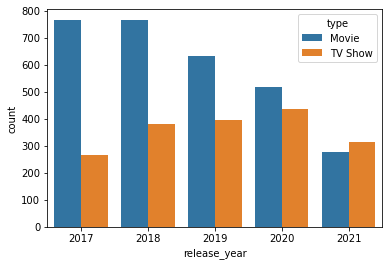

In [13]:
df_temp=df[df['release_year']>=2017]
sns.countplot(x='release_year',hue='type',data=df_temp)
plt.show()

 - As we see both grapths are in same shape in first plot but as wee as zoomed version in countplot we are clearly able to see that in last 5 years the number of movies decresed and number of TV Shows increased, which indeed says that in recent years Netflix is focusing more on TV Shows

#### What is the best time to launch a TV show?
Note: Analyzing with which month most no of TV shows released.

C:\Users\akash\AppData\Local\Temp\ipykernel_38040\1122455223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['released_month']=df_tv['date_added'].dt.strftime('%B')


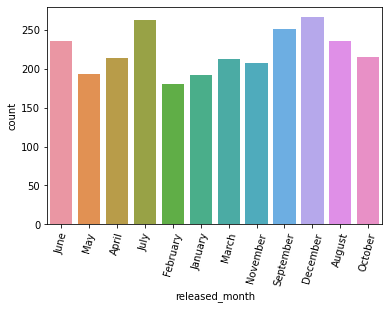

In [49]:
df_tv=df[df['type']=='TV Show']
df_tv['released_month']=df_tv['date_added'].dt.strftime('%B')
sns.countplot(x='released_month',data=df_tv)
plt.xticks(rotation=75)
plt.show()

 - We are able to see a peak in middle of the year which is 6th,7th,8th Month and at 12th month. Preciosuly December and July are the best time to release the TV shows.

### As cast column is nested splitting it into different rows to make it easier to analyze.

In [15]:
df_cast=df['cast'].str.split(', ')
df_cast.index=df['title']
df_cast=df_cast.reset_index().explode('cast')
df_cast.head(7)

,title,cast
0,Ali & Ratu Ratu Queens,Iqbaal Ramadhan
0,Ali & Ratu Ratu Queens,Nirina Zubir
0,Ali & Ratu Ratu Queens,Asri Welas
0,Ali & Ratu Ratu Queens,Tika Panggabean
0,Ali & Ratu Ratu Queens,Happy Salma
0,Ali & Ratu Ratu Queens,Aurora Ribero
0,Ali & Ratu Ratu Queens,Marissa Anita


#### observations:
- Social Distance had big cast

In [16]:
df_cast.describe()

,title,cast
count,64951,64126
unique,8807,36439
top,Social Distance,Anupam Kher
freq,50,43


### Using similar technique above used on cast column to split the other nested column includes listed_in,director,country

In [17]:
df_genre=df['listed_in'].str.split(', ')
df_genre.index=df['title']
df_genre=df_genre.reset_index()
df_genre=df_genre.explode('listed_in')
df_genre.head(7)

,title,listed_in
0,Ali & Ratu Ratu Queens,Comedies
0,Ali & Ratu Ratu Queens,Dramas
0,Ali & Ratu Ratu Queens,International Movies
1,Black Holes | The Edge of All We Know,Documentaries
2,Sweet & Sour,Comedies
2,Sweet & Sour,International Movies
2,Sweet & Sour,Romantic Movies


#### observations:
- Dramas,Comedies,Documentaries are the top most involved genre in all movies and tv series.

Note: International Movies and International TV Shows are not genre , they are mostly like type of the movie

In [18]:
df_genre['listed_in'].value_counts()[0:5]

International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: listed_in, dtype: int64

In [19]:
df_dir=df['director'].str.split(', ')
df_dir.index=df['title']
df_dir=df_dir.reset_index()
df_dir=df_dir.explode('director')
df_dir.head(7)

,title,director
0,Ali & Ratu Ratu Queens,Lucky Kuswandi
1,Black Holes | The Edge of All We Know,Peter Galison
2,Sweet & Sour,Lee Kae-byeok
3,Sweet Tooth,NaN
4,Trippin' with the Kandasamys,Jayan Moodley
5,Xtreme,Daniel Benmayor
6,Alan Saldaña: Locked Up,Alex Díaz


#### Observations:
 - Walt Disney Animation Studios Short Films Collection had directed by most number of directors 13.

In [20]:
df_dir.describe()

,title,director
count,9612,6978
unique,8807,4993
top,Walt Disney Animation Studios Short Films Coll...,Rajiv Chilaka
freq,13,22


In [21]:
df_dir['title'].value_counts()[0:1]

Walt Disney Animation Studios Short Films Collection    13
Name: title, dtype: int64

In [22]:
df_coun=df['country'].str.split(', ')
df_coun.index=df['title']
df_coun=df_coun.reset_index()
df_coun=df_coun.explode('country')
df_coun.head(7)

,title,country
0,Ali & Ratu Ratu Queens,NaN
1,Black Holes | The Edge of All We Know,NaN
2,Sweet & Sour,South Korea
3,Sweet Tooth,United States
4,Trippin' with the Kandasamys,South Africa
5,Xtreme,Spain
6,Alan Saldaña: Locked Up,Mexico


#### Observation:
 - United States have produced more number of movies and TV series which implies that they have big film industry

In [23]:
df_coun.describe()

,title,country
count,10845,10014
unique,8807,127
top,Barbecue,United States
freq,12,3689


### Lets merge the data 
 - Note: Why not merging all columns at once ?
 - will create duplicates and counts will be inconsistent of the categorical columns.

#### Country vs Genre

In [24]:
df_new=pd.merge(df,df_coun,on='title',how='left')
df_new=pd.merge(df_new,df_genre,on='title',how='left')
df_new.head(2)

,show_id,type,title,director,cast,country_x,date_added,release_year,rating,duration,listed_in_x,description,country_y,listed_in_y
0,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,2021-06-17,2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",NaN,Comedies
1,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,2021-06-17,2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",NaN,Dramas


In [25]:
temp=df_new.groupby(['country_y','listed_in_y']).size().reset_index()
temp.sort_values(by=[0],ascending=False).head(6)

,country_y,listed_in_y,0
526,India,International Movies,864
1351,United States,Dramas,835
1346,United States,Comedies,680
522,India,Dramas,662
1349,United States,Documentaries,511
1339,United States,Action & Adventure,404


We can get the country and genre which is linked and also have more nu,ber of movies and TV Shows
 - In US and Inida which are top countried in making films and TV shows are more insterested in Dramas.

#### Cast vs Genre

In [26]:
df_new=pd.merge(df,df_cast,on='title',how='left')
df_new=pd.merge(df_new,df_genre,on='title',how='left')
df_new.head(2)

,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in_x,description,cast_y,listed_in_y
0,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,2021-06-17,2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",Iqbaal Ramadhan,Comedies
1,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,2021-06-17,2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",Iqbaal Ramadhan,Dramas


In [27]:
temp=df_new.groupby(['cast_y','listed_in_y']).size().reset_index()
temp.sort_values(by=[0],ascending=False).head(6)

,cast_y,listed_in_y,0
8830,Anupam Kher,International Movies,38
94654,Shah Rukh Khan,International Movies,32
75002,Naseeruddin Shah,Dramas,28
8828,Anupam Kher,Dramas,28
94653,Shah Rukh Khan,Dramas,28
2668,Akshay Kumar,International Movies,27


Anupam Kher,Naseeruddin Shah and Shah Rukh Khan are the actors who done most movies or TV shows in one genre.From this we can also get each actors favorite genre.

#### Director vs Genre

In [28]:
df_new=pd.merge(df,df_dir,on='title',how='left')
df_new=pd.merge(df_new,df_genre,on='title',how='left')
df_new.head(2)

,show_id,type,title,director_x,cast,country,date_added,release_year,rating,duration,listed_in_x,description,director_y,listed_in_y
0,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,2021-06-17,2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",Lucky Kuswandi,Comedies
1,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,2021-06-17,2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",Lucky Kuswandi,Dramas


In [29]:
temp=df_new.groupby(['director_y','listed_in_y']).size().reset_index()
temp.sort_values(by=[0],ascending=False).head(6)

,director_y,listed_in_y,0
8969,Rajiv Chilaka,Children & Family Movies,22
4553,Jan Suter,Stand-Up Comedy,21
9107,Raúl Campos,Stand-Up Comedy,19
10736,Suhas Kadav,Children & Family Movies,16
6817,Marcus Raboy,Stand-Up Comedy,15
4675,Jay Karas,Stand-Up Comedy,14


Rajiv Chilaka have directed most number of movies in one genre.

#### Director vs Cast

In [30]:
df_new=pd.merge(df,df_dir,on='title',how='left')
df_new=pd.merge(df_new,df_cast,on='title',how='left')
df_new.head(2)

,show_id,type,title,director_x,cast_x,country,date_added,release_year,rating,duration,listed_in,description,director_y,cast_y
0,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,2021-06-17,2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",Lucky Kuswandi,Iqbaal Ramadhan
1,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,2021-06-17,2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",Lucky Kuswandi,Nirina Zubir


In [31]:
temp=df_new.groupby(['director_y','cast_y']).size().reset_index()
temp.sort_values(by=[0],ascending=False).head(6)

,director_y,cast_y,0
35337,Rajiv Chilaka,Rajesh Kava,19
35331,Rajiv Chilaka,Julie Tejwani,19
35338,Rajiv Chilaka,Rupa Bhimani,18
35330,Rajiv Chilaka,Jigna Bhardwaj,18
35345,Rajiv Chilaka,Vatsal Dubey,16
35334,Rajiv Chilaka,Mousam,13


As per above we can say that Rajiv Chilaka's favourite cast members are Rajesh Kava and Julie Tejwani

#### With following analysis ,Netflix can produce successfull TV show.
     - Best Director,Top 5 cast members,Top 3 genre to create a story, Best month to release a TV Show,Best country to release on.
     - Best Month to release TV Show is we already analyzed with count plot and got December and July.
#### Why select TV show ?
- Increase in number of release in recent years which shows it is improving field.
- Number of release is less compare to movies which shows it still have more to explore in that TV show field.

In [32]:
df_new=df.loc[df['type']=='TV Show']

#### Best director -- purely by number of TV shows he/she did , as i believe if director is not good will not get to do many TV Shows.

In [33]:
df_new.isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [34]:
df_new.shape

(2676, 12)

In [35]:
2446/2676

0.914050822122571

In 2676 rows 2446 is missing for director , that is more than 90 percent .From this we can conclude that finding best director for the TV Show with this dataset is out of scope.

#### Best Country -- purely by number of TV shows made in the particular country.

In [36]:
df_c=pd.merge(df_new,df_coun,on='title',how='left')
df_c['country_y'].value_counts().reset_index()

,index,country_y
0,United States,938
1,United Kingdom,272
2,Japan,199
3,South Korea,170
4,Canada,126
...,...,...
61,Austria,1
62,Uruguay,1
63,Syria,1
64,Hungary,1


In [37]:
df_c[df_c.duplicated()]

,show_id,type,title,director,cast,country_x,date_added,release_year,rating,duration,listed_in,description,country_y


By far US have more number of TV Shows lets check its progress to see how in recent years no of release is in US

<AxesSubplot:xlabel='release_year', ylabel='count'>

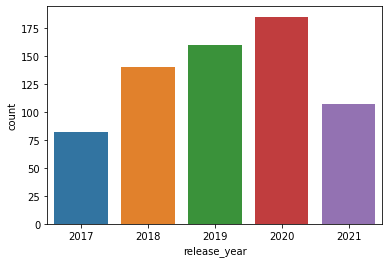

In [38]:
temp=df_c.loc[(df_c['country_y']=='United States') & (df_c['release_year']>=2017)]
sns.countplot(x='release_year',data=temp)

As we see the graph which implies the increase in counts of the country variable in the dataset which also represent that number of TV shows are increasing year by year it came down at 2021 due to corona , we can neglect that as we are moving past corona in coming months,From this we can conclude best country to make TV Show is United States.

#### Top 3 Genre

In [39]:
df_g=pd.merge(df_new,df_genre,on='title',how='left')
df_g['listed_in_y'].value_counts().reset_index().head(5)

,index,listed_in_y
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451


From above we can say that TV Dramas,TV Comedies and Crime TV Shows are the top 3 genre.

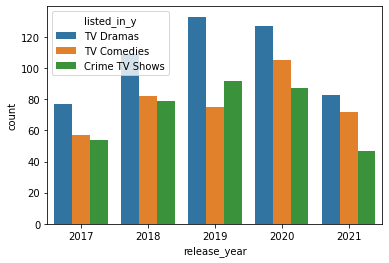

In [40]:
l=['TV Dramas','TV Comedies','Crime TV Shows']
temp=df_g.loc[(df_g['release_year']>=2017) & (df_g['listed_in_y'].isin(l))]
sns.countplot(x='release_year',hue='listed_in_y',data=temp)
plt.show()

#### Top 5 Cast Members-- As we planned on releasing movie in US lets get cast members who already established in US.

In [41]:
df_ca=pd.merge(df_new,df_cast,on='title',how='left')
df_ca=df_ca.loc[df_ca['country'] == 'United States' ]
df_ca['cast_y'].value_counts().reset_index().head(7)

,index,cast_y
0,Grey Griffin,7
1,Mike Colter,7
2,Steven Yeun,6
3,Kari Wahlgren,6
4,Kevin Michael Richardson,6
5,Keith David,5
6,Sean Astin,5


These are the top 5 cast members in TV Shows 
- Grey Griffin,Mike Colter,Kevin Michael Richardson,Kari Wahlgren,Steven Yeun

#### As year progressed how number of minutes in a movies have changed.

In [42]:
df_new=df.loc[df['type']=='Movie']
temp=df_new['duration'].str.extractall('(\d+)')
temp=temp.reset_index().drop(['match'],axis=1).set_index('level_0')
df_new['minutes']=temp[0].astype('int')
df_new['Avg_Minutes']=df_new.groupby(['release_year'])['minutes'].transform(np.mean)
df_new.head(3)

C:\Users\akash\AppData\Local\Temp\ipykernel_38040\2215455627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['minutes']=temp[0].astype('int')
C:\Users\akash\AppData\Local\Temp\ipykernel_38040\2215455627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Avg_Minutes']=df_new.groupby(['release_year'])['minutes'].transform(np.mean)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,Avg_Minutes
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,2021-06-17,2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",101.0,96.444043
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,2021-06-02,2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...,99.0,96.444043
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,2021-06-04,2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...,103.0,96.444043


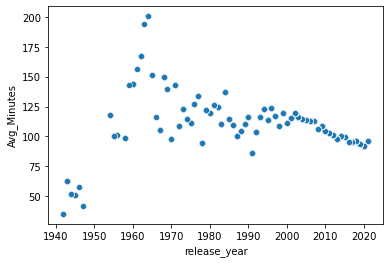

In [43]:
sns.scatterplot(data=df_new,x='release_year',y='Avg_Minutes')
plt.show()

Before 2000 whatever we had those are outliers , as we saw above in boxplot so lets focus after . As per the plot Avg movie time per year is almost in range of 85 , 125 for last 21 years, Which says we have standard timings.

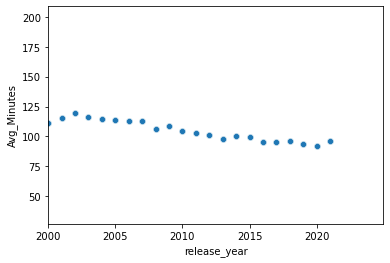

In [44]:
sns.scatterplot(data=df_new,x='release_year',y='Avg_Minutes')
plt.xlim(2000,)
plt.show()